In [2]:
%matplotlib inline

In [3]:
import pickle
import numpy as np
import awkward
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import uproot
import boost_histogram as bh
import mplhep
import glob

mplhep.style.use("CMS")

In [4]:
CMS_PF_CLASS_NAMES = ["none" "charged hadron", "neutral hadron", "hfem", "hfhad", "photon", "electron", "muon"]

ELEM_LABELS_CMS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ELEM_NAMES_CMS = ["NONE", "TRACK", "PS1", "PS2", "ECAL", "HCAL", "GSF", "BREM", "HFEM", "HFHAD", "SC", "HO"]

CLASS_LABELS_CMS = [0, 211, 130, 1, 2, 22, 11, 13]
CLASS_NAMES_CMS = ["none", "ch.had", "n.had", "HFEM", "HFHAD", "$\gamma$", "$e^\pm$", "$\mu^\pm$"]

class_names = {k: v for k, v in zip(CLASS_LABELS_CMS, CLASS_NAMES_CMS)}

In [5]:
path = "/home/joosep/reco/mlpf/CMSSW_12_3_0_pre6/src/"

In [6]:
physics_process = "qcd" #"ttbar", "qcd"

In [7]:
def cms_label(ax, x0=0.01, x1=0.15, x2=0.98, y=0.94):
    plt.figtext(x0, y,'CMS',fontweight='bold', wrap=True, horizontalalignment='left', transform=ax.transAxes)
    plt.figtext(x1, y,'Simulation Preliminary', style='italic', wrap=True, horizontalalignment='left', transform=ax.transAxes)
    plt.figtext(x2, y,'Run 3 (14 TeV)',  wrap=False, horizontalalignment='right', transform=ax.transAxes)

def cms_label_sample_label(ax, x0=0.01, x1=0.15, x2=0.98, y=0.94):
    plt.figtext(x0, y,'CMS',fontweight='bold', wrap=True, horizontalalignment='left', transform=ax.transAxes)
    plt.figtext(x1, y,'Simulation Preliminary', style='italic', wrap=True, horizontalalignment='left', transform=ax.transAxes)
    plt.figtext(x2, y,'Run 3 (14 TeV)',  wrap=False, horizontalalignment='right', transform=ax.transAxes)
    plt.figtext(x0, y-0.05,'QCDPU events', wrap=True, horizontalalignment='left', transform=ax.transAxes)

    
def sample_label(ax, additional_text="", x=0.01, y=0.87):
    plt.text(x, y, "$\mathrm{t}\overline{\mathrm{t}}$ events"+additional_text, ha="left", transform=ax.transAxes)
    
physics_process_str = {
    "ttbar": "$t\\bar{t}$ events",
    "singlepi": "single $\pi^{\pm}$ events",
    "qcd": "QCD events",
}

In [ ]:
# def ratio_unc(h0, h1):
#     ratio = h0/h1
    
#     ratio.values()[np.isnan(ratio.values())] = 0
#     ratio.values()[np.isinf(ratio.values())] = 0
    
#     c0 = h0.values()
#     c1 = h1.values()
#     v0 = np.sqrt(c0)
#     v1 = np.sqrt(c1)
    
#     unc_ratio = ratio.values()*np.sqrt((v0/c0)**2 + (v1/c1)**2)
#     unc_ratio[np.isnan(unc_ratio)] = 0
#     unc_ratio[np.isinf(unc_ratio)] = 0
#     return ratio, unc_ratio

In [ ]:
# def plot_candidates_pf_vs_mlpf(variable, varname, bins):
#     plt.figure(figsize=(16,16))
#     ax = plt.axes()

#     hists_baseline = []
#     hists_mlpf = []
#     iplot = 1
#     for pid in [13,11,22,1,2,130,211]:
#         msk1 = np.abs(data_baseline["particleFlow"]["pdgId"]) == pid
#         msk2 = np.abs(data_mlpf["particleFlow"]["pdgId"]) == pid

#         d1 = awkward.flatten(data_baseline["particleFlow"][variable][msk1])
#         d2 = awkward.flatten(data_mlpf["particleFlow"][variable][msk2])
            
#         h1 = bh.Histogram(bh.axis.Variable(bins))
#         h1.fill(d1)
#         h2 = bh.Histogram(bh.axis.Variable(bins))
#         h2.fill(d2)
        
#         ax = plt.subplot(3,3,iplot)
#         plt.sca(ax)

#         mplhep.histplot(h1, histtype="step", lw=2, label="PF");
#         mplhep.histplot(h2, histtype="step", lw=2, label="MLPF");
        
#         if variable!="eta":
#             plt.yscale("log")

#         plt.legend(loc="best", frameon=False, title=class_names[pid])
#         plt.xlabel(varname)
#         plt.ylabel("Number of particles / bin")
#         sample_label(ax, x=0.08)

#         iplot += 1
        
#         hists_baseline.append(h1)
#         hists_mlpf.append(h2)
#     plt.tight_layout()
#     return hists_baseline, hists_mlpf

# def plot_candidates_pf_vs_mlpf_single(hists, ncol=1):
#     #plt.figure(figsize=(10, 13))
#     f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
#     plt.sca(a0)
#     mplhep.cms.label("Preliminary", data=False, loc=0, rlabel="Run 3 (14 TeV)")
#     v1 = mplhep.histplot([h[bh.rebin(2)] for h in hists[0]], stack=True, label=[class_names[k] for k in [13,11,22,1,2,130,211]], lw=1)
#     v2 = mplhep.histplot([h[bh.rebin(2)] for h in hists[1]], stack=True, color=[x.stairs.get_edgecolor() for x in v1], lw=2, histtype="errorbar")
#     plt.yscale("log")
#     plt.ylim(top=1e8)
#     sample_label(a0)
    
#     if ncol==1:
#         legend1 = plt.legend(v1, [x.legend_artist.get_label() for x in v1], loc=(0.40, 0.25), title="PF", ncol=1)
#         legend2 = plt.legend(v2, [x.legend_artist.get_label() for x in v1], loc=(0.65, 0.25), title="MLPF", ncol=1)
#     elif ncol==2:
#         legend1 = plt.legend(v1, [x.legend_artist.get_label() for x in v1], loc=(0.05, 0.50), title="PF", ncol=2)
#         legend2 = plt.legend(v2, [x.legend_artist.get_label() for x in v1], loc=(0.50, 0.50), title="MLPF", ncol=2)

#     plt.gca().add_artist(legend1)
#     plt.ylabel("Total number of particles / bin")
    
#     plt.sca(a1)
#     sum_h0 = sum(hists[0])
#     sum_h1 = sum(hists[1])
    
#     ratio, unc_ratio = ratio_unc(sum_h0, sum_h1)

#     mplhep.histplot(ratio, histtype="errorbar", color="black", yerr=unc_ratio)
#     plt.ylim(0,2)
#     plt.axhline(1.0, color="black", ls="--")
#     plt.ylabel("PF / MLPF")

#     #lt.tight_layout()

#     #cms_label(ax)
#     #sample_label(ax)
    
#     return a0, a1

In [ ]:
# hists = plot_candidates_pf_vs_mlpf("pt", "PFCandidate $p_T$ [GeV]", np.linspace(0,200,41))
# plt.savefig("candidates_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_candidates_pf_vs_mlpf_single(hists)
# plt.xlabel("PFCandidate $p_T$ [GeV]")
# plt.savefig("candidates_pt_single_{}.pdf".format(physics_process), bbox_inches="tight")
# plt.savefig("candidates_pt_single_{}.png".format(physics_process), dpi=400, bbox_inches="tight")

In [ ]:
# hists = plot_candidates_pf_vs_mlpf("eta", "PFCandidate $\eta$", np.linspace(-6, 6,101))
# plt.savefig("candidates_eta_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_candidates_pf_vs_mlpf_single(hists, ncol=2)
# a0.set_yscale("log")
# a0.set_ylim(10,1e10)
# plt.xlabel("PFCandidate $\eta$")
# plt.savefig("candidates_eta_single_{}.pdf".format(physics_process), bbox_inches="tight")
# plt.savefig("candidates_eta_single_{}.png".format(physics_process), dpi=400, bbox_inches="tight")

In [ ]:
# def plot_pf_vs_mlpf_jet(jetcoll, variable, bins, jetcoll_name, cumulative=False, binwnorm=False):
#     f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
#     plt.sca(a0)
#     mplhep.cms.label("Preliminary", data=False, loc=0, rlabel="Run 3 (14 TeV)")

#     h1 = bh.Histogram(bh.axis.Variable(bins))
#     h1.fill(awkward.flatten(data_baseline[jetcoll][variable]))
#     if cumulative:
#         h1[:] = np.sum(h1.values()) - np.cumsum(h1)

#     h2 = bh.Histogram(bh.axis.Variable(bins))
#     h2.fill(awkward.flatten(data_mlpf[jetcoll][variable]))
#     if cumulative:
#         h2[:] = np.sum(h2.values()) - np.cumsum(h2)

#     mplhep.histplot(h1, histtype="step", lw=2, label="PF", binwnorm=binwnorm);
#     mplhep.histplot(h2, histtype="step", lw=2, label="MLPF", binwnorm=binwnorm);
#     #cms_label(ax)
#     sample_label(a0, additional_text=jetcoll_name)

#     plt.ylabel("Number of jets / GeV")
#     plt.legend(loc=1, frameon=False)
    
#     plt.sca(a1)
#     plt.axhline(1.0, color="black", ls="--")
#     plt.ylim(0,2)
#     ratio, unc_ratio = ratio_unc(h1, h2)
#     mplhep.histplot(ratio, histtype="errorbar", color="black", yerr=unc_ratio)
#     return a0, a1
        

In [ ]:
# def varbins(b0, b1):
#     return np.concatenate([b0[:-1], b1])

In [ ]:
# jet_bins = varbins(np.linspace(0,100,21), np.linspace(100,200,5))

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("ak4PFJetsCHS", "pt", jet_bins, ", AK4 CHS jets", cumulative=False, binwnorm=1)
# a0.set_yscale("log")
# a0.set_ylim(1, 1e5)
# a1.set_ylabel("PF / MLPF")
# #plt.ylim(top=1e6)
# plt.xlabel("jet $p_T$ [GeV]")
# plt.savefig("ak4jet_chs_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("ak4PFJetsPuppi", "pt", jet_bins, ", AK4 PUPPI jets", cumulative=False, binwnorm=1)
# a0.set_yscale("log")
# a1.set_ylabel("PF / MLPF")
# a0.set_ylim(1, 1e4)
# plt.xlabel("jet $p_T$ [GeV]")
# plt.savefig("ak4jet_puppi_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("ak4PFJetsCHS", "eta", np.linspace(-6, 6, 61), ", AK4 CHS jets", cumulative=False, binwnorm=None)
# #a0.set_yscale("log")
# a0.set_ylim(0, 8000)
# a1.set_ylabel("PF / MLPF")
# a0.set_ylabel("Number of jets / 0.2")
# plt.xlabel("jet $\eta$")
# plt.savefig("ak4jet_chs_eta_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("ak4PFJetsPuppi", "eta", np.linspace(-6, 6, 61), ", AK4 PUPPI jets", cumulative=False, binwnorm=None)
# a0.set_ylim(0,2000)
# a1.set_ylabel("PF / MLPF")
# plt.xlabel("jet $\eta$")
# a0.set_ylabel("Number of jets / 0.2")
# plt.savefig("ak4jet_puppi_eta_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# met_bins = varbins(np.linspace(0,150,21), np.linspace(150,450,5))

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("pfMet", "pt", met_bins, ", PF MET", cumulative=False, binwnorm=1)
# a0.set_yscale("log")
# a1.set_ylabel("PF / MLPF")
# a0.set_ylim(top=1e3)
# a0.set_ylabel("Number of events / GeV")
# plt.xlabel("MET $p_T$ [GeV]")
# plt.savefig("pfmet_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("pfMet", "pt", met_bins, ", PF MET", cumulative=True, binwnorm=None)
# a0.set_yscale("log")
# a1.set_ylabel("PF / MLPF")
# a0.set_ylim(top=4000)
# plt.xlabel("MET $p_T$ [GeV]")
# a0.set_ylabel("Cumulative events")
# plt.savefig("pfmet_c_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("pfMetPuppi", "pt", met_bins, ", PUPPI MET", cumulative=False, binwnorm=1)
# a0.set_yscale("log")
# a0.set_ylim(top=1e3)
# plt.xlabel("MET $p_T$ [GeV]")
# a0.set_ylabel("Number of events / GeV")
# plt.savefig("pfmet_puppi_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
# a0, a1 = plot_pf_vs_mlpf_jet("pfMetPuppi", "pt", met_bins, ", PUPPI MET", cumulative=True, binwnorm=None)
# a0.set_yscale("log")
# a1.set_ylabel("PF / MLPF")
# a0.set_ylim(top=4000)
# plt.xlabel("MET $p_T$ [GeV]")
# a0.set_ylabel("Cumulative events")
# plt.savefig("pfmet_puppi_c_pt_{}.pdf".format(physics_process), bbox_inches="tight")

In [ ]:
timing_output = """
Nelem=1600 mean_time=4.66 ms stddev_time=2.55 ms mem_used=711 MB
Nelem=1920 mean_time=4.74 ms stddev_time=0.52 ms mem_used=711 MB
Nelem=2240 mean_time=5.53 ms stddev_time=0.63 ms mem_used=711 MB
Nelem=2560 mean_time=5.88 ms stddev_time=0.52 ms mem_used=711 MB
Nelem=2880 mean_time=6.22 ms stddev_time=0.63 ms mem_used=745 MB
Nelem=3200 mean_time=6.50 ms stddev_time=0.64 ms mem_used=745 MB
Nelem=3520 mean_time=7.07 ms stddev_time=0.61 ms mem_used=745 MB
Nelem=3840 mean_time=7.53 ms stddev_time=0.68 ms mem_used=745 MB
Nelem=4160 mean_time=7.76 ms stddev_time=0.69 ms mem_used=745 MB
Nelem=4480 mean_time=8.66 ms stddev_time=0.72 ms mem_used=745 MB
Nelem=4800 mean_time=9.00 ms stddev_time=0.57 ms mem_used=745 MB
Nelem=5120 mean_time=9.22 ms stddev_time=0.84 ms mem_used=745 MB
Nelem=5440 mean_time=9.64 ms stddev_time=0.73 ms mem_used=812 MB
Nelem=5760 mean_time=10.39 ms stddev_time=1.06 ms mem_used=812 MB
Nelem=6080 mean_time=10.77 ms stddev_time=0.69 ms mem_used=812 MB
Nelem=6400 mean_time=11.33 ms stddev_time=0.75 ms mem_used=812 MB
Nelem=6720 mean_time=12.19 ms stddev_time=0.77 ms mem_used=812 MB
Nelem=7040 mean_time=12.54 ms stddev_time=0.72 ms mem_used=812 MB
Nelem=7360 mean_time=13.08 ms stddev_time=0.78 ms mem_used=812 MB
Nelem=7680 mean_time=13.71 ms stddev_time=0.81 ms mem_used=812 MB
Nelem=8000 mean_time=14.11 ms stddev_time=0.74 ms mem_used=812 MB
Nelem=8320 mean_time=14.85 ms stddev_time=0.86 ms mem_used=812 MB
Nelem=8640 mean_time=15.36 ms stddev_time=0.79 ms mem_used=812 MB
Nelem=8960 mean_time=16.76 ms stddev_time=1.06 ms mem_used=812 MB
Nelem=9280 mean_time=17.27 ms stddev_time=0.71 ms mem_used=812 MB
Nelem=9600 mean_time=17.97 ms stddev_time=0.85 ms mem_used=812 MB
Nelem=9920 mean_time=18.73 ms stddev_time=0.94 ms mem_used=812 MB
Nelem=10240 mean_time=19.26 ms stddev_time=0.89 ms mem_used=812 MB
Nelem=10560 mean_time=19.91 ms stddev_time=0.90 ms mem_used=946 MB
Nelem=10880 mean_time=20.55 ms stddev_time=0.87 ms mem_used=946 MB
Nelem=11200 mean_time=21.82 ms stddev_time=0.78 ms mem_used=940 MB
Nelem=11520 mean_time=22.48 ms stddev_time=0.75 ms mem_used=940 MB
Nelem=11840 mean_time=23.33 ms stddev_time=0.98 ms mem_used=940 MB
Nelem=12160 mean_time=24.28 ms stddev_time=0.85 ms mem_used=940 MB
Nelem=12480 mean_time=24.85 ms stddev_time=0.67 ms mem_used=940 MB
Nelem=12800 mean_time=25.58 ms stddev_time=0.68 ms mem_used=940 MB
Nelem=13120 mean_time=26.58 ms stddev_time=0.78 ms mem_used=940 MB
Nelem=13440 mean_time=27.15 ms stddev_time=0.63 ms mem_used=940 MB
Nelem=13760 mean_time=27.72 ms stddev_time=0.85 ms mem_used=940 MB
Nelem=14080 mean_time=28.08 ms stddev_time=0.66 ms mem_used=940 MB
Nelem=14400 mean_time=28.70 ms stddev_time=0.73 ms mem_used=940 MB
Nelem=14720 mean_time=29.22 ms stddev_time=0.66 ms mem_used=940 MB
Nelem=15040 mean_time=29.73 ms stddev_time=0.80 ms mem_used=940 MB
Nelem=15360 mean_time=30.71 ms stddev_time=0.85 ms mem_used=940 MB
Nelem=15680 mean_time=31.15 ms stddev_time=0.74 ms mem_used=940 MB
Nelem=16000 mean_time=31.74 ms stddev_time=0.80 ms mem_used=940 MB
Nelem=16320 mean_time=32.27 ms stddev_time=0.77 ms mem_used=940 MB
Nelem=16640 mean_time=33.07 ms stddev_time=1.08 ms mem_used=940 MB
Nelem=16960 mean_time=33.60 ms stddev_time=0.69 ms mem_used=940 MB
Nelem=17280 mean_time=34.43 ms stddev_time=0.64 ms mem_used=940 MB
Nelem=17600 mean_time=35.34 ms stddev_time=0.75 ms mem_used=940 MB
Nelem=17920 mean_time=35.84 ms stddev_time=0.68 ms mem_used=940 MB
Nelem=18240 mean_time=36.51 ms stddev_time=0.85 ms mem_used=940 MB
Nelem=18560 mean_time=37.23 ms stddev_time=0.87 ms mem_used=940 MB
Nelem=18880 mean_time=37.72 ms stddev_time=0.78 ms mem_used=940 MB
Nelem=19200 mean_time=38.33 ms stddev_time=0.87 ms mem_used=940 MB
Nelem=19520 mean_time=38.95 ms stddev_time=0.87 ms mem_used=940 MB
Nelem=19840 mean_time=39.73 ms stddev_time=0.74 ms mem_used=940 MB
Nelem=20160 mean_time=40.27 ms stddev_time=0.81 ms mem_used=940 MB
Nelem=20480 mean_time=40.86 ms stddev_time=0.74 ms mem_used=940 MB
Nelem=20800 mean_time=41.71 ms stddev_time=0.94 ms mem_used=940 MB
Nelem=21120 mean_time=42.35 ms stddev_time=1.38 ms mem_used=1209 MB
Nelem=21440 mean_time=42.91 ms stddev_time=1.18 ms mem_used=1209 MB
Nelem=21760 mean_time=43.40 ms stddev_time=0.98 ms mem_used=1184 MB
Nelem=22080 mean_time=44.43 ms stddev_time=1.04 ms mem_used=1184 MB
Nelem=22400 mean_time=45.22 ms stddev_time=1.02 ms mem_used=1184 MB
Nelem=22720 mean_time=45.57 ms stddev_time=0.94 ms mem_used=1184 MB
Nelem=23040 mean_time=46.21 ms stddev_time=0.86 ms mem_used=1184 MB
Nelem=23360 mean_time=46.85 ms stddev_time=0.95 ms mem_used=1184 MB
Nelem=23680 mean_time=47.52 ms stddev_time=1.57 ms mem_used=1184 MB
Nelem=24000 mean_time=48.31 ms stddev_time=0.74 ms mem_used=1184 MB
Nelem=24320 mean_time=48.92 ms stddev_time=0.75 ms mem_used=1184 MB
Nelem=24640 mean_time=49.70 ms stddev_time=0.92 ms mem_used=1184 MB
Nelem=24960 mean_time=50.26 ms stddev_time=0.93 ms mem_used=1184 MB
Nelem=25280 mean_time=50.98 ms stddev_time=0.89 ms mem_used=1184 MB
"""

In [ ]:
time_x = []
time_y = []
time_y_err = []
gpu_mem_use = []
for line in timing_output.split("\n"):
    if len(line)>0:
        spl = line.split()
        time_x.append(int(spl[0].split("=")[1]))
        time_y.append(float(spl[1].split("=")[1]))
        time_y_err.append(float(spl[3].split("=")[1]))
        gpu_mem_use.append(float(spl[5].split("=")[1]))

In [ ]:
# import glob
# nelem = []
# for fi in glob.glob("../data/TTbar_14TeV_TuneCUETP8M1_cfi/raw/*.pkl"):
#     d = pickle.load(open(fi, "rb"))
#     for elem in d:
#         X = elem["Xelem"][(elem["Xelem"]["typ"]!=2)&(elem["Xelem"]["typ"]!=3)]
#         nelem.append(X.shape[0])

# plt.figure(figsize=(7, 7))
# ax = plt.axes()
# plt.hist(nelem, bins=np.linspace(2000,6000,100));
# plt.ylabel("Number of events / bin")
# plt.xlabel("PFElements per event")
# cms_label(ax)
# sample_label(ax, physics_process="ttbar")

In [ ]:
plt.figure(figsize=(10, 3))
ax = plt.axes()
mplhep.cms.label("Preliminary", data=False, loc=0, rlabel="Run 3 (14 TeV)")
plt.errorbar(time_x, time_y, yerr=time_y_err, marker=".")
plt.axvline(np.mean(nelem)-np.std(nelem), color="black", ls="--", lw=1.0)
plt.axvline(np.mean(nelem)+np.std(nelem), color="black", ls="--", lw=1.0)
#plt.xticks(time_x, time_x);
plt.xlim(0,30000)
plt.ylim(0,100)
plt.ylabel("runtime [ms/ev]")
plt.xlabel("PFElements per event")
#plt.legend(loc=4, frameon=False)
#cms_label(ax, y=0.93, x1=0.07, x2=0.99)
plt.text(4000, 20, "typical Run3 range", rotation=90, fontsize=10)
plt.text(6000, 50, "Inference with ONNXRuntime in a single CPU thread,\nsingle GPU stream on NVIDIA RTX2060S 8GB.\nNot a production-like setup. Synthetic inputs.\nModel throughput only, no data preparation.\nPerformance vary depending on the chosen\noptimizations and hyperparameters.", fontsize=10)
plt.savefig("runtime_scaling.pdf", bbox_inches="tight")
plt.savefig("runtime_scaling.png", bbox_inches="tight", dpi=300)

In [ ]:
plt.figure(figsize=(10, 3))
ax = plt.axes()
mplhep.cms.label("Preliminary", data=False, loc=0, rlabel="Run 3 (14 TeV)")

plt.plot(time_x, gpu_mem_use, marker=".")
plt.axvline(np.mean(nelem)-np.std(nelem), color="black", ls="--", lw=1.0)
plt.axvline(np.mean(nelem)+np.std(nelem), color="black", ls="--", lw=1.0)
#plt.xticks(time_x, time_x);
plt.xlim(0,30000)
plt.ylim(0,3000)
plt.ylabel("GPU RSS [MB]")
plt.xlabel("PFElements per event")
#cms_label(ax, y=0.93, x1=0.07, x2=0.99)
plt.text(4000, 1000, "typical Run3 range", rotation=90, fontsize=10)
plt.text(6000, 1400, "Inference with ONNXRuntime in a single CPU thread,\nsingle GPU stream on NVIDIA RTX2060S 8GB.\nNot a production-like setup. Synthetic inputs.\nModel throughput only, no data preparation.\nPerformance vary depending on the chosen\noptimizations and hyperparameters.", fontsize=10)
plt.savefig("memory_scaling.pdf", bbox_inches="tight")
plt.savefig("memory_scaling.png", bbox_inches="tight", dpi=300)

In [ ]:
def get_cputime(infile):
    times = {}
    for line in open(infile).readlines():
        if "TimeModule" in line:
            module = line.split()[4]
            time = float(line.split()[5])
            if not module in times:
                times[module] = []
            times[module].append(time)
    for k in times.keys():
        times[k] = 1000.0*np.array(times[k])
    return times

In [8]:
def get_hist_and_merge(files, histname):
    hists = []
    for fn in files:
        fi = uproot.open(fn)
        h = fi[histname].to_boost()
        h = bh.Histogram(*h.axes, storage=bh.storage.Weight())
        h.view().value = fi[histname].values()
        h.view().variance = fi[histname].variances()
        hists.append(h)
    return sum(hists[1:], hists[0])

In [9]:
files1 = ["/home/joosep/particleflow/data/QCDPU_baseline/DQM_{}.root".format(i) for i in range(1,40)]
files2 = ["/home/joosep/particleflow/data/QCDPU_mlpf_v0/DQM_{}.root".format(i) for i in range(1,40)]

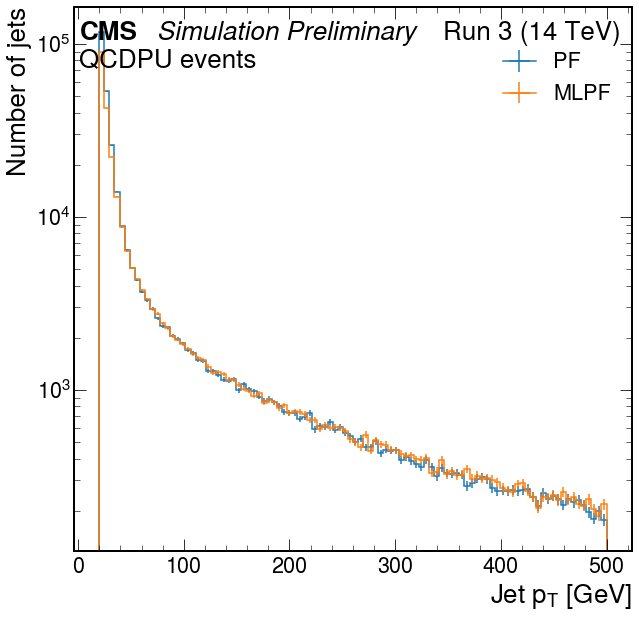

In [14]:
k = "DQMData/Run 1/JetMET/Run summary/Jet/Uncleanedak4PFJets/Pt"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
#plt.axhline(1.0, color="black")
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.xlabel("Jet $p_T$ [GeV]")
plt.ylabel("Number of jets")
plt.yscale("log")
plt.savefig("cmssw_jet_pt.pdf")

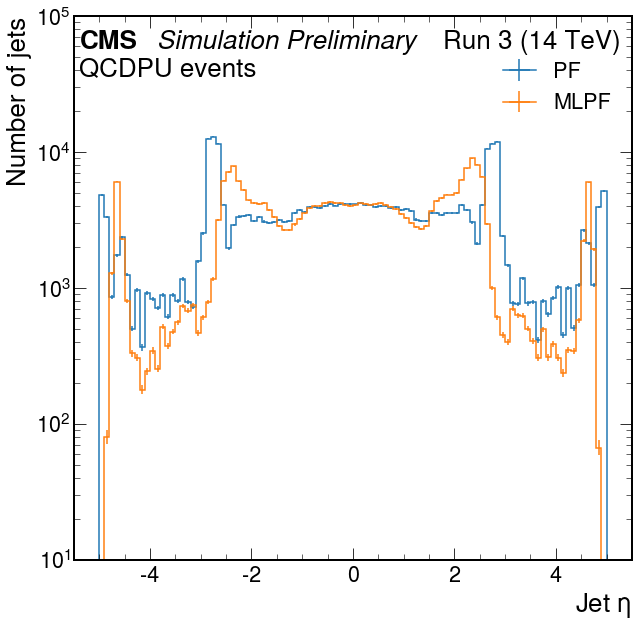

In [17]:
k = "DQMData/Run 1/JetMET/Run summary/Jet/Uncleanedak4PFJets/Eta"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
#plt.axhline(1.0, color="black")
plt.legend(loc=(0.75, 0.8))
plt.ylim(bottom=10, top=1e5)
cms_label_sample_label(ax)
plt.xlabel("Jet $\eta$")
plt.ylabel("Number of jets")
plt.yscale("log")
plt.savefig("cmssw_jet_eta.pdf")

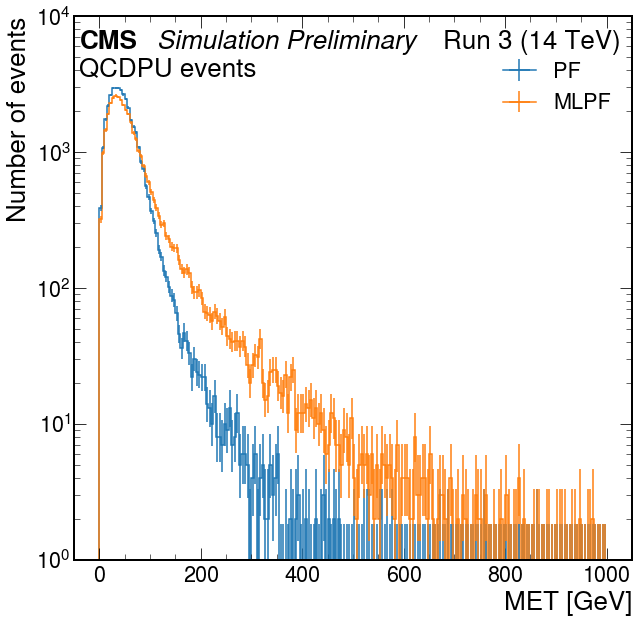

In [13]:
k = "DQMData/Run 1/JetMET/Run summary/MET/pfMet/Cleaned/MET"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
#plt.axhline(1.0, color="black")
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.xlabel("MET [GeV]")
plt.ylabel("Number of events")
plt.yscale("log")
plt.ylim(1, 1e4)
plt.savefig("cmssw_met.pdf")

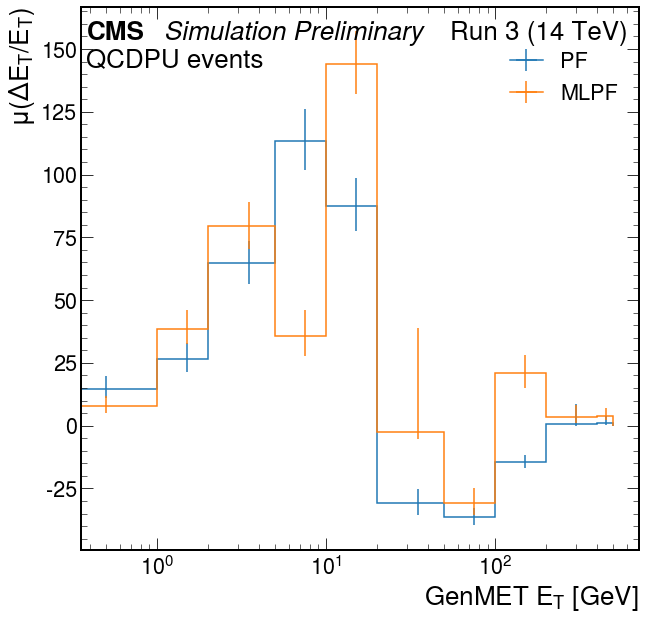

In [18]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFMETValidation/CompWithGenMET/mean_delta_et_Over_et_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
plt.xscale("log")
#plt.axhline(1.0, color="black")
plt.xlabel("GenMET $E_T$ [GeV]")
plt.ylabel("$\mu(\Delta E_T / E_T)$")
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.savefig("met_deltaet_mu.pdf")

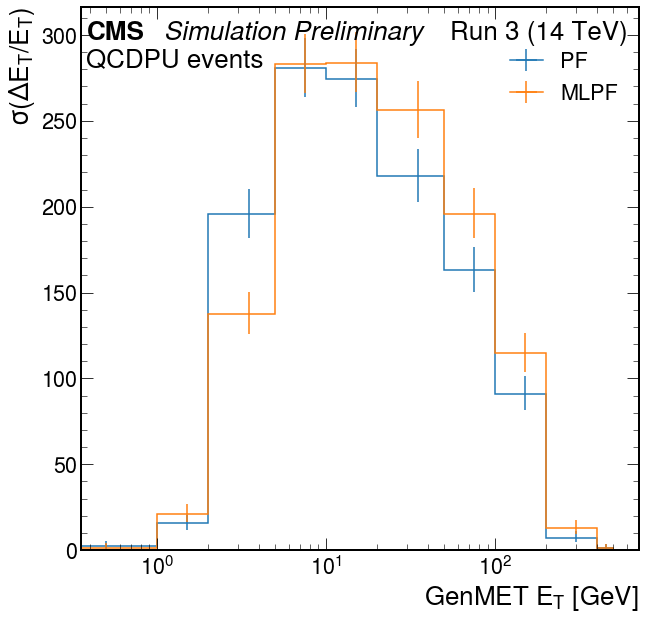

In [19]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFMETValidation/CompWithGenMET/sigma_delta_et_Over_et_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
plt.xscale("log")
#plt.axhline(1.0, color="black")
plt.xlabel("GenMET $E_T$ [GeV]")
plt.ylabel("$\sigma(\Delta E_T / E_T)$")
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.savefig("met_deltaet_sigma.pdf")

/usr/local/lib/python3.8/dist-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


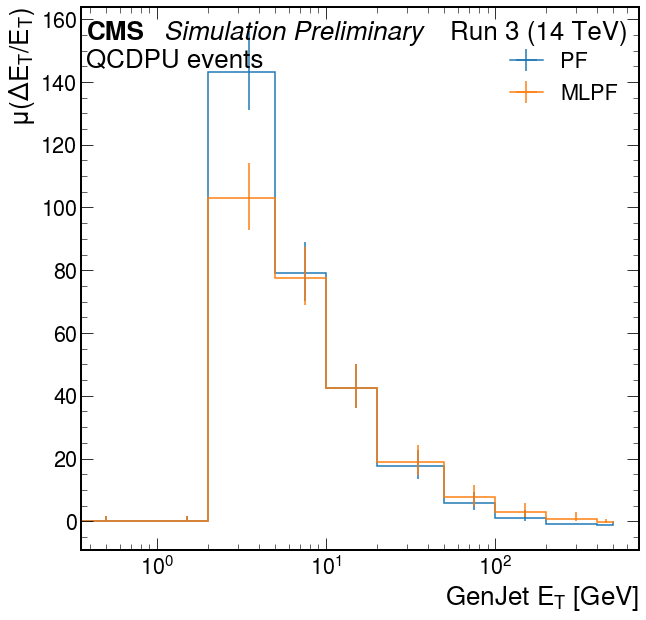

In [20]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFJetValidation/CompWithGenJet/mean_delta_et_Over_et_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
plt.xscale("log")
#plt.axhline(1.0, color="black")
plt.xlabel("GenJet $E_T$ [GeV]")
plt.ylabel("$\mu(\Delta E_T / E_T)$")
plt.legend()
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.savefig("jet_deltaet_mu.pdf")

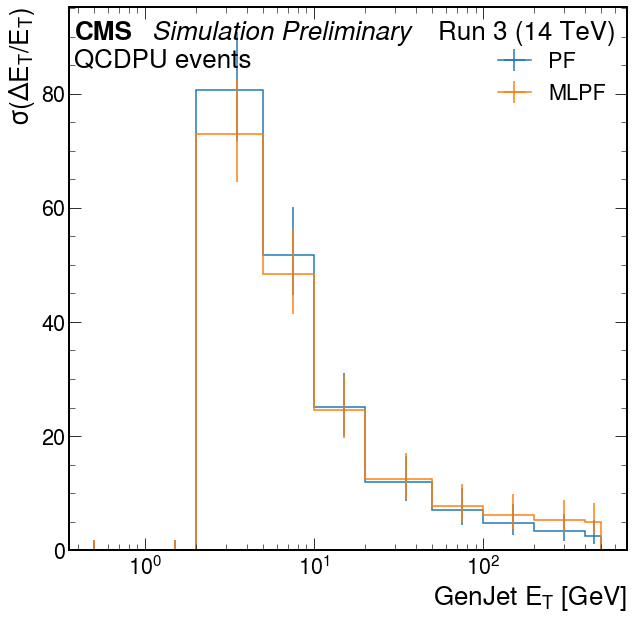

In [21]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFJetValidation/CompWithGenJet/sigma_delta_et_Over_et_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

ax = plt.axes()
mplhep.histplot(hi1, label="PF")
mplhep.histplot(hi2, label="MLPF")
plt.xscale("log")
#plt.axhline(1.0, color="black")
plt.xlabel("GenJet $E_T$ [GeV]")
plt.ylabel("$\sigma(\Delta E_T / E_T)$")
plt.legend(loc=(0.75, 0.8))
cms_label_sample_label(ax)
plt.savefig("jet_deltaet_sigma.pdf")

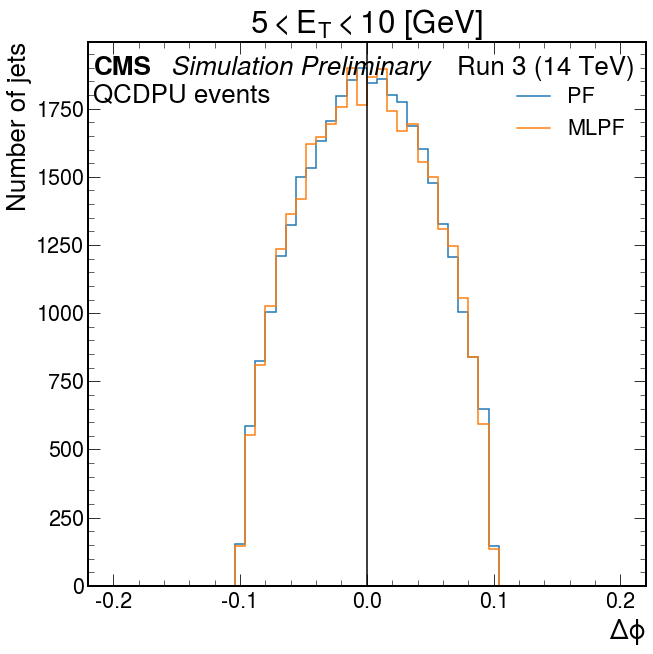

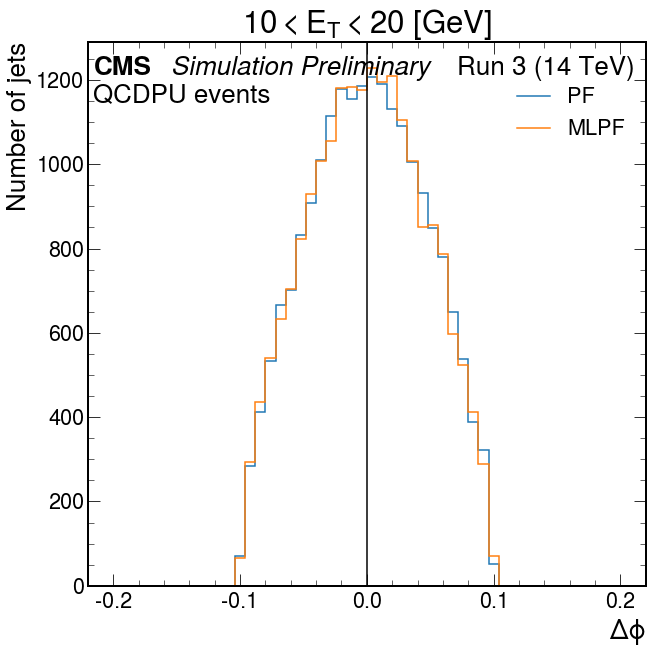

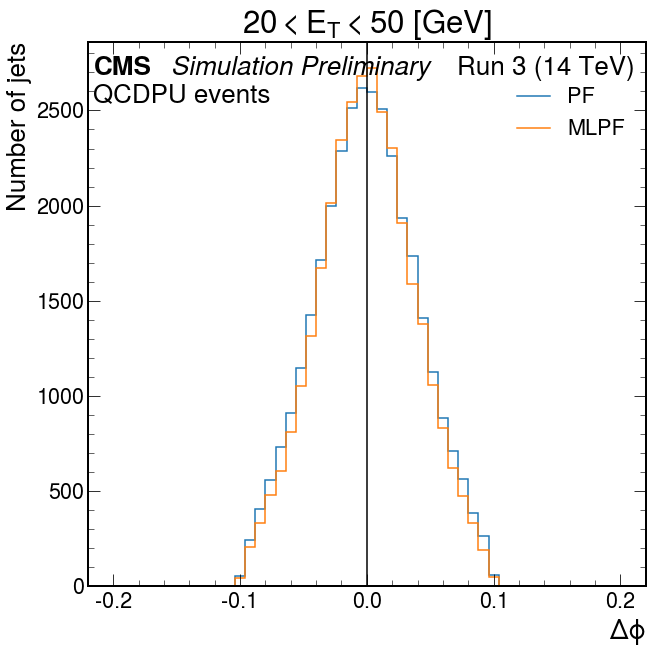

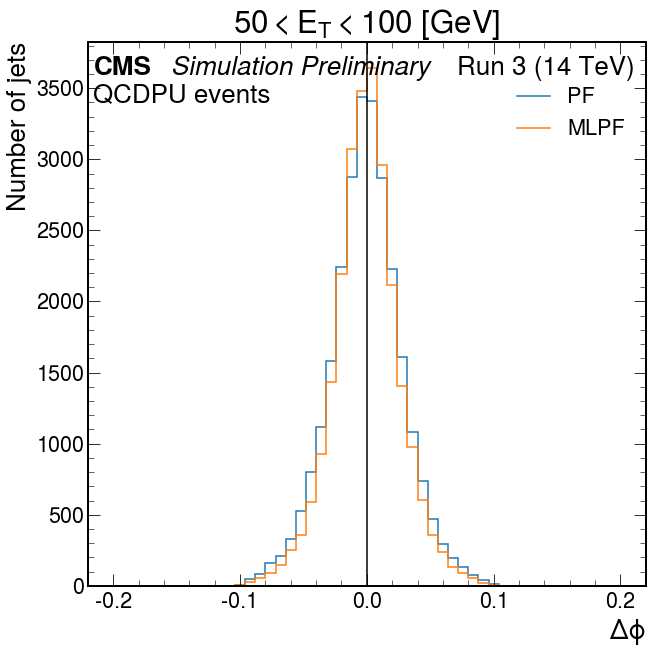

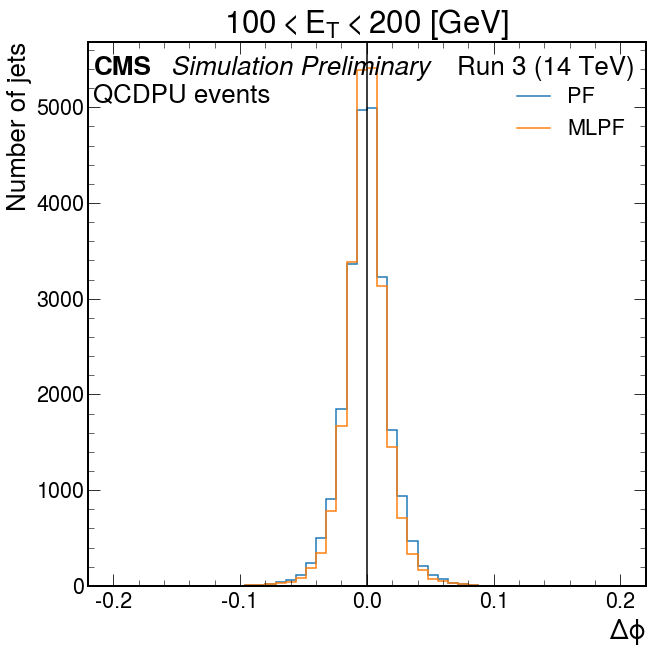

In [22]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFJetValidation/CompWithGenJet/delta_phi_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

for ibin in range(3,8):
    plt.figure()
    ax = plt.axes()
    plt.title(r"${:.0f} < E_T < {:.0f}$ [GeV]".format(hi1.axes[0].edges[ibin], hi1.axes[0].edges[ibin+1]))
    mplhep.histplot((hi1.values()[ibin, :], hi1.axes[1]), label="PF")
    mplhep.histplot((hi2.values()[ibin, :], hi1.axes[1]), label="MLPF")

    plt.axvline(0.0, color="black")
    plt.xlabel("$\Delta \phi$")
    plt.ylabel("Number of jets")
    plt.legend(loc=(0.75, 0.8))
    cms_label_sample_label(ax)
    plt.savefig("jet_deltaphi_{}.pdf".format(ibin))

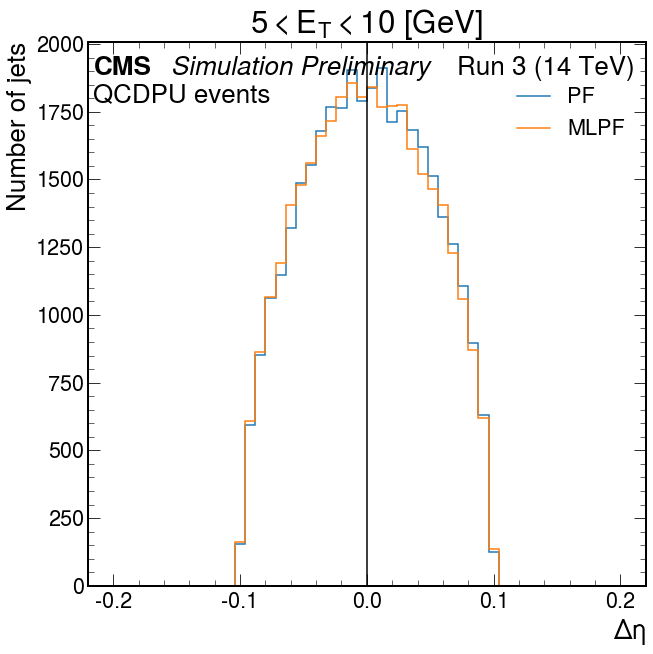

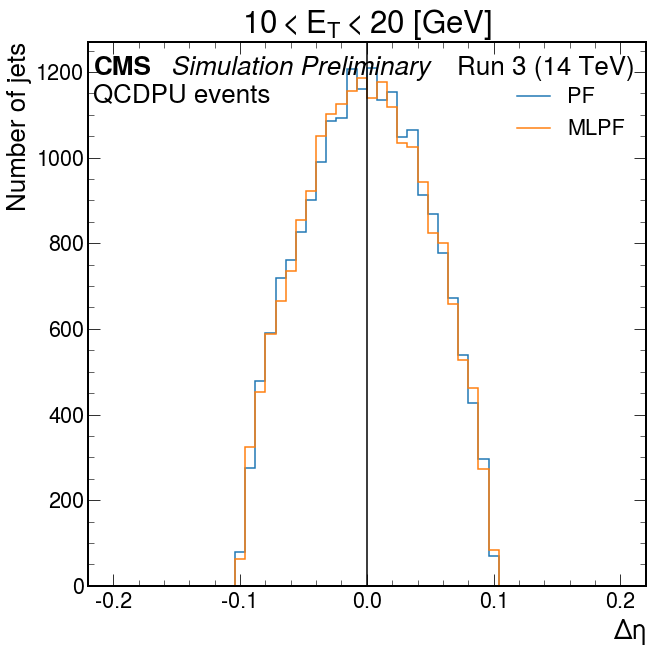

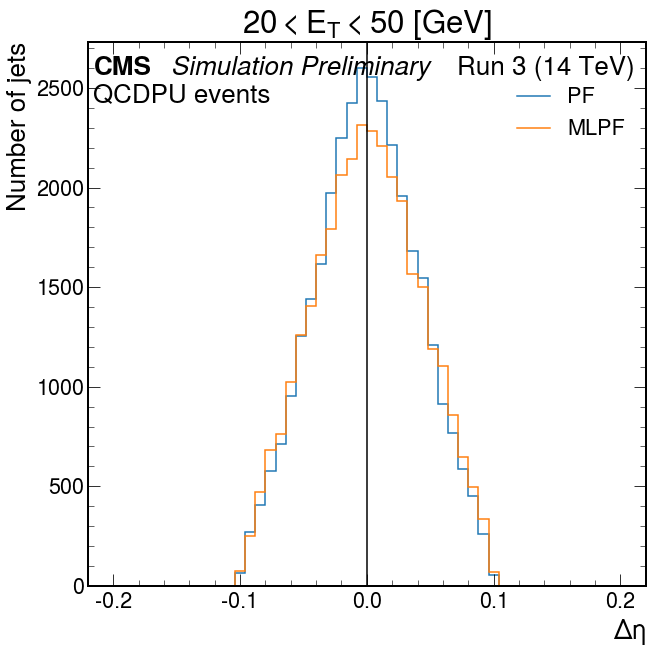

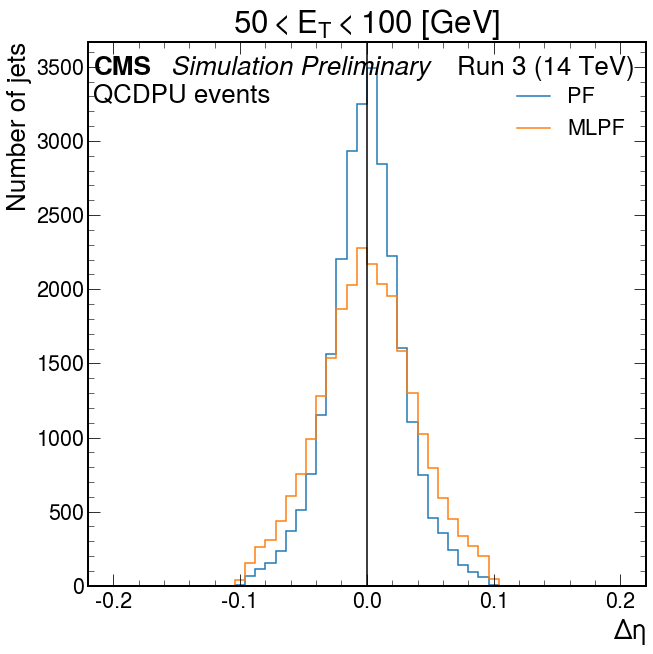

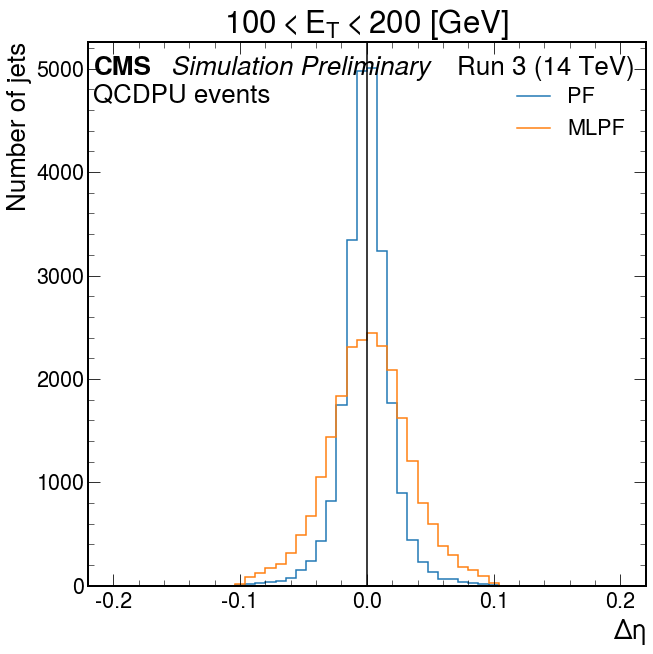

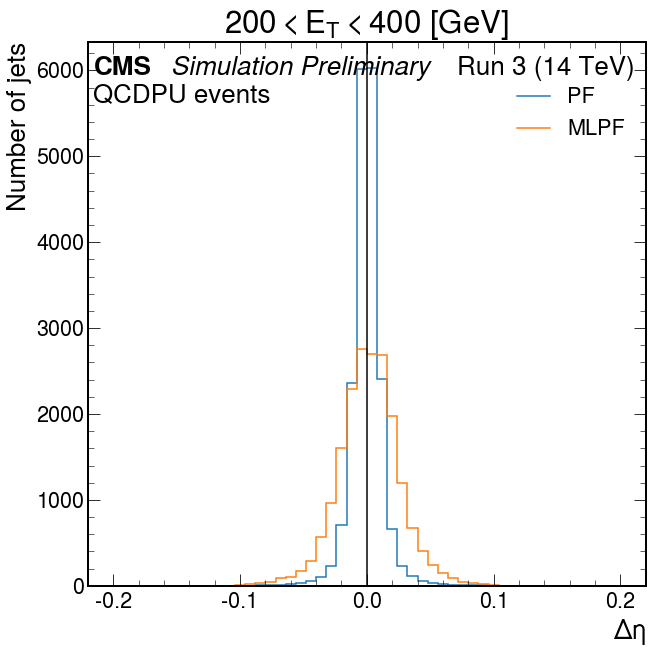

In [23]:
k = "DQMData/Run 1/ParticleFlow/Run summary/PFJetValidation/CompWithGenJet/delta_eta_VS_et_"
hi1 = get_hist_and_merge(files1, k)
hi2 = get_hist_and_merge(files2, k)

for ibin in range(3,9):
    plt.figure()
    ax = plt.axes()
    plt.title(r"${:.0f} < E_T < {:.0f}$ [GeV]".format(hi1.axes[0].edges[ibin], hi1.axes[0].edges[ibin+1]))
    mplhep.histplot((hi1.values()[ibin, :], hi1.axes[1]), label="PF")
    mplhep.histplot((hi2.values()[ibin, :], hi1.axes[1]), label="MLPF")

    plt.axvline(0.0, color="black")
    plt.xlabel("$\Delta \eta$")
    plt.ylabel("Number of jets")
    plt.legend(loc=(0.75, 0.8))
    cms_label_sample_label(ax)
    plt.savefig("jet_deltaeta_{}.pdf".format(ibin))

/usr/local/lib/python3.8/dist-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


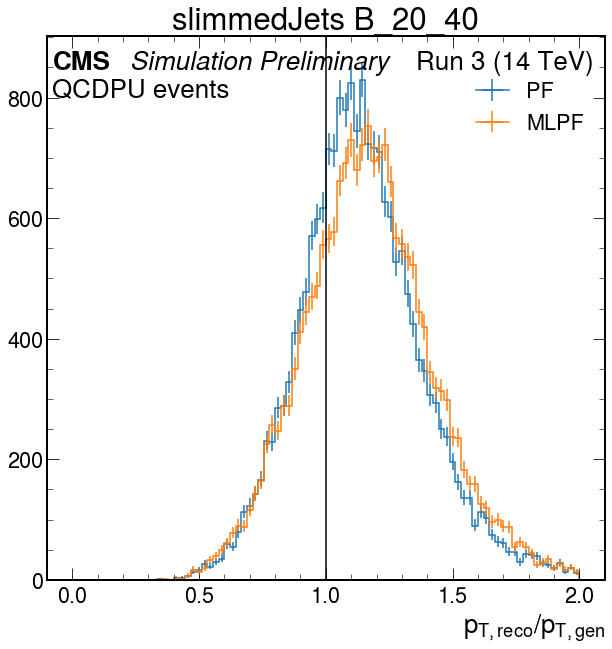

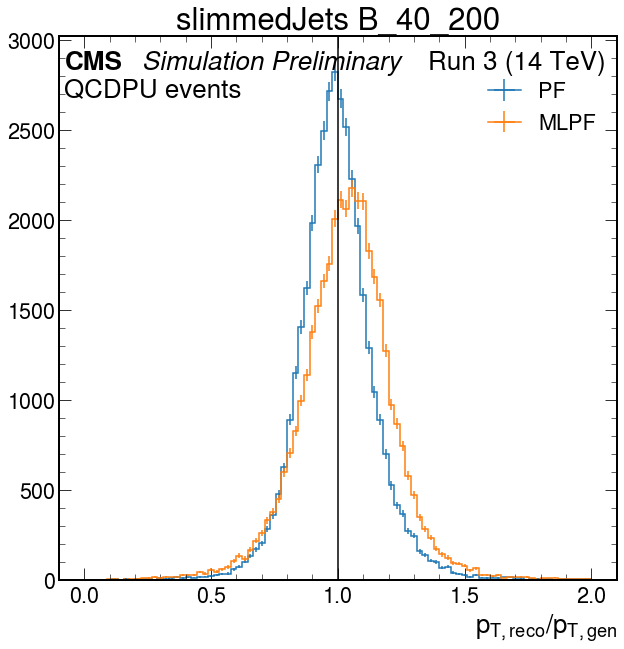

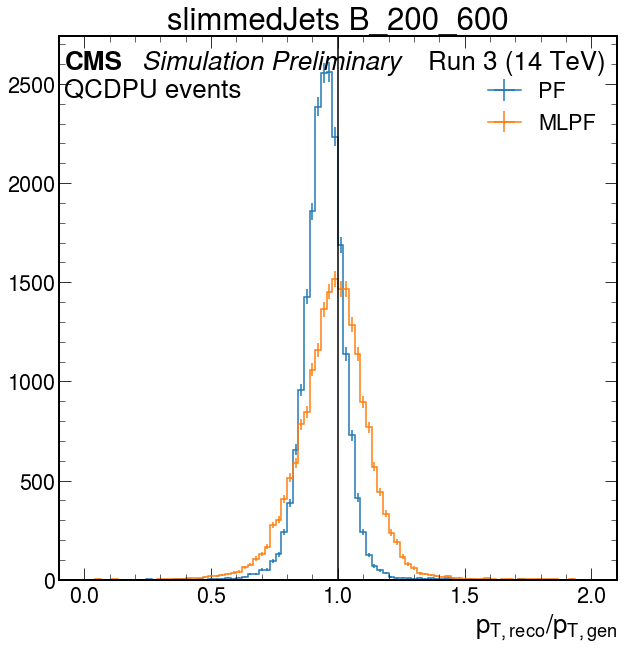

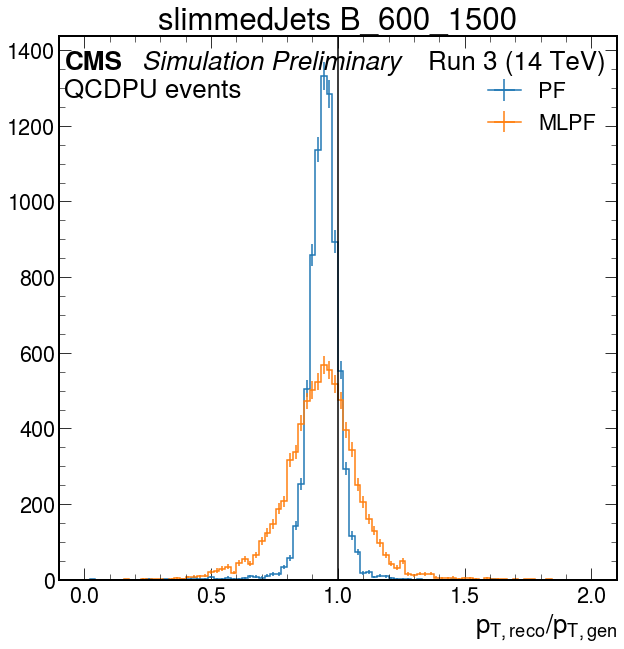

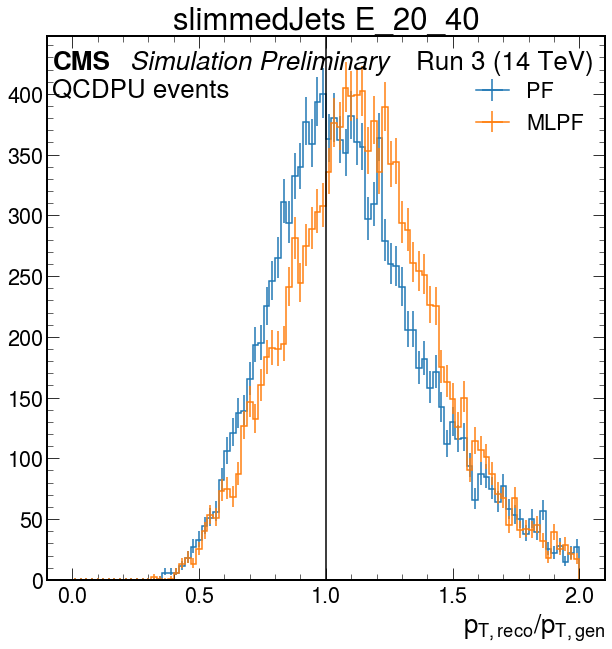

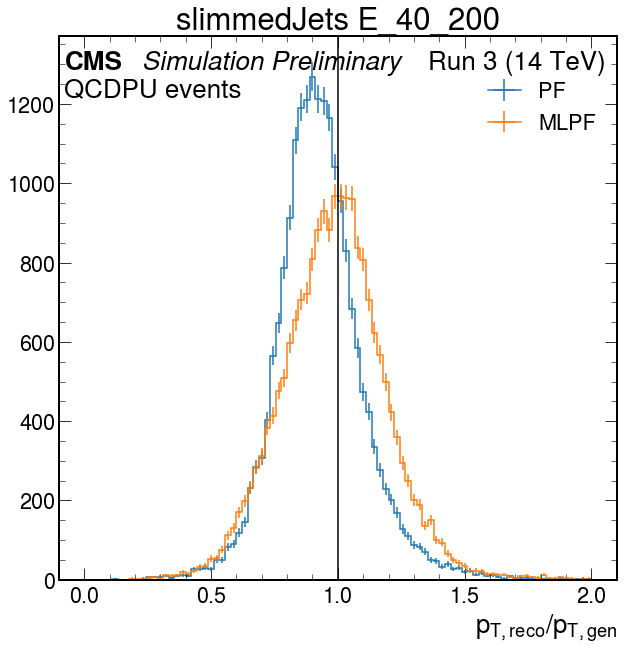

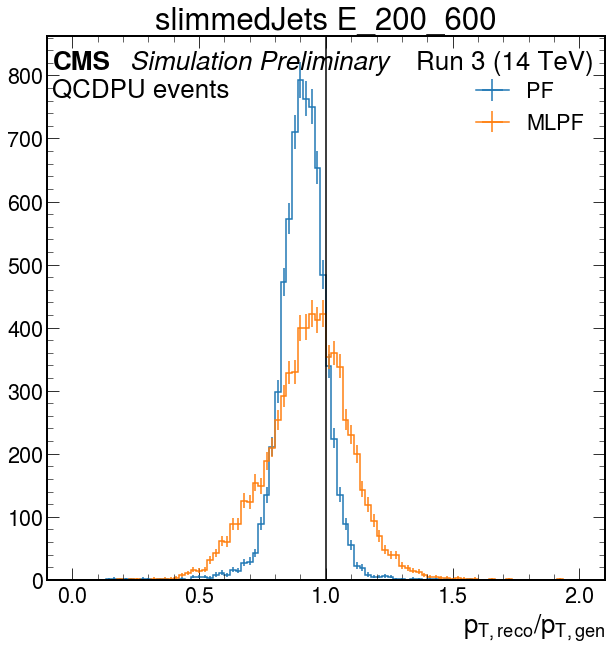

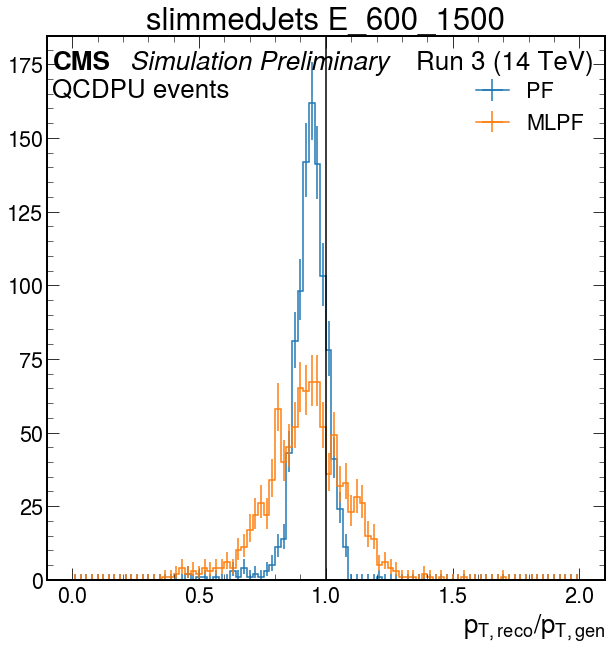

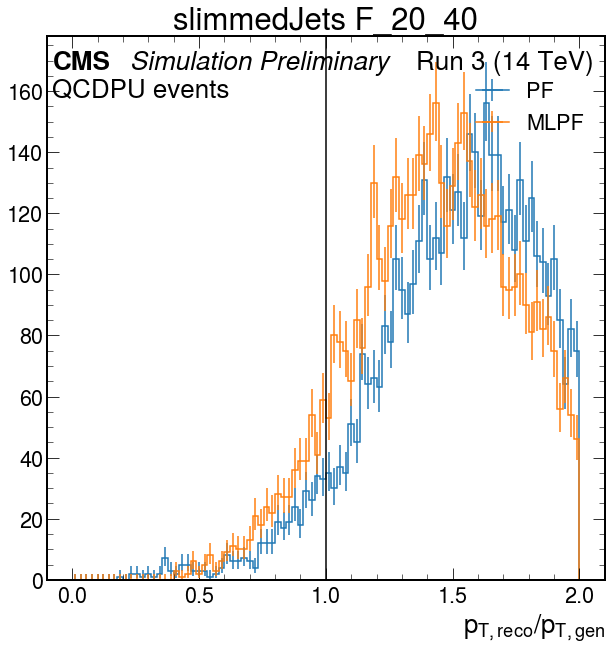

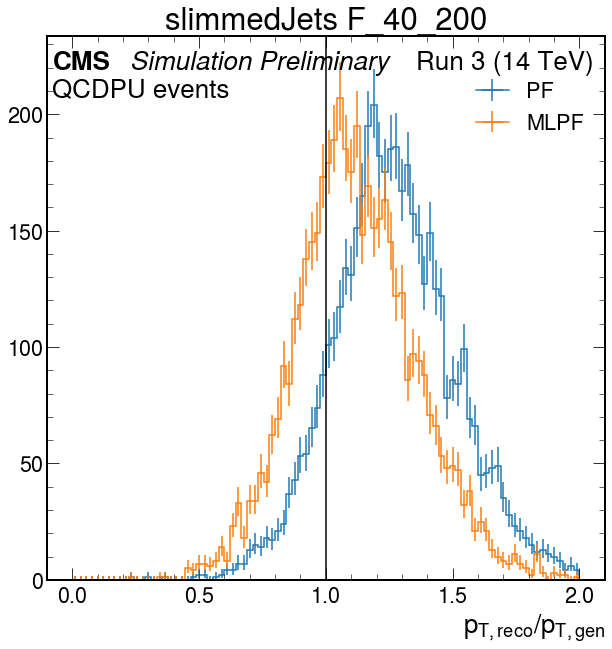

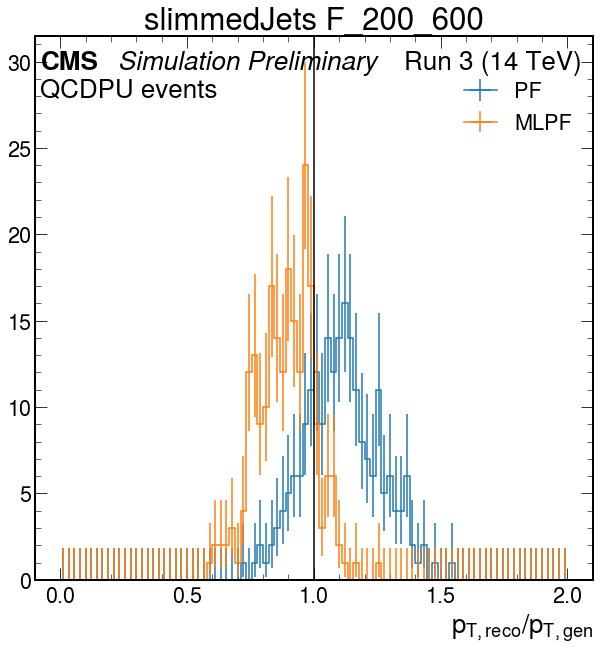

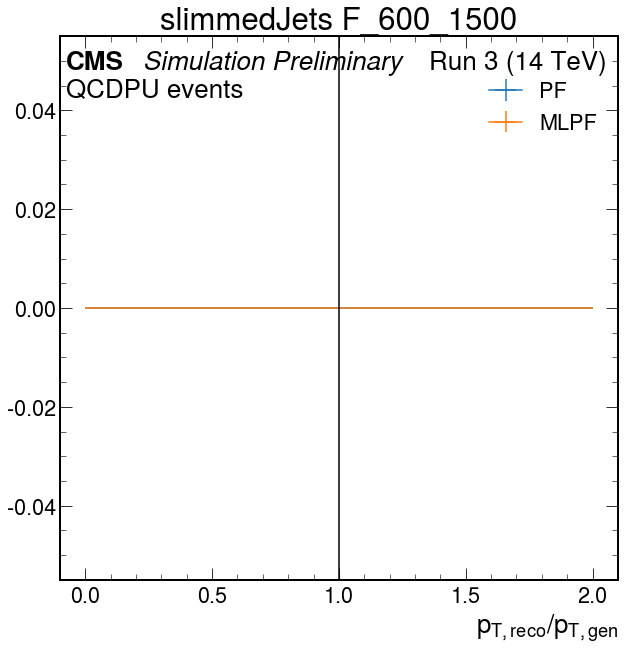

In [82]:
for histk in [
        "B_20_40",
        "B_40_200",
        "B_200_600",
        "B_600_1500",
        "E_20_40",
        "E_40_200",
        "E_200_600",
        "E_600_1500",
        "F_20_40",
        "F_40_200",
        "F_200_600",
        "F_600_1500",
    ]:
    k = "DQMData/Run 1/JetMET/Run summary/JetValidation/slimmedJets/PtRecoOverGen_{}".format(histk)
    plt.figure()
    ax = plt.axes()
    hi1 = get_hist_and_merge(files1, k)
    hi2 = get_hist_and_merge(files2, k)

    mplhep.histplot(hi1, label="PF")
    mplhep.histplot(hi2, label="MLPF")

    plt.axvline(1.0, color="black")
    plt.xlabel("$p_{T,\mathrm{reco}}/p_{T,\mathrm{gen}}$")
    plt.title("slimmedJets " + histk)
    
    plt.legend(loc=(0.75, 0.8))
    cms_label_sample_label(ax)

In [ ]:
# for histk in [
#         "MET0to20",
#         "MET20to40",
#         "MET40to60",
#         "MET60to80",
#         "MET80to100",
#         "MET100to150",
#         "MET150to200",
#         "MET200to300",
#         "MET300to400",
#         "MET400to500",
#         "MET500",
#     ]:
#     k = "DQMData/Run 1/JetMET/Run summary/METValidation/slimmedMETs/METResolution_GenMETTrue_{}".format(histk)
#     plt.figure()
#     hi1 = get_hist_and_merge(files1, k)
#     hi2 = get_hist_and_merge(files2, k)
#     mplhep.histplot(hi1, label="PF")
#     mplhep.histplot(hi2, label="MLPF")
#     plt.axvline(1.0, color="black")
#     plt.xlabel("MET resolution")
#     plt.title(histk)
#     plt.yscale("log")